## Plots for the SLR210 Project

**Generate random data**

In [1]:
import csv
import random


def write_to_csv(filename, data):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['N', 'Alpha', 'Tle', 'Execution Time'])
        for entry in data:
            writer.writerow(entry)

# Example usage:
data = [
    (100, 0.1, 5, 10.2),
    (200, 0.2, 10, 20.5),
    # Add more data as needed
]

write_to_csv('benchmark_data.csv', data)

def generate_execution_time():
    return random.uniform(1, 10)  # Assuming execution time ranges from 1 to 10 seconds

# Generate combinations of N, Tle, and Alpha
N_values = [3, 10, 100]
tle_values = [0.5, 1, 1.5, 2]
alpha_values = [0, 0.1, 1]

data = []

for N in N_values:
    for tle in tle_values:
        for alpha in alpha_values:
            execution_time = generate_execution_time()
            data.append((N, alpha, tle, execution_time))

# Write data to CSV
write_to_csv('random_benchmark_data.csv', data)

**Imports and fetching the data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

from importlib import reload
reload(plt)
%matplotlib widget


# Load the benchmark data from the CSV file
df = pd.read_csv('random_benchmark_data.csv')


Line plot of the latency with varrying N and fixed tle.
Consider taking the average on alpha instead of a fixed one.

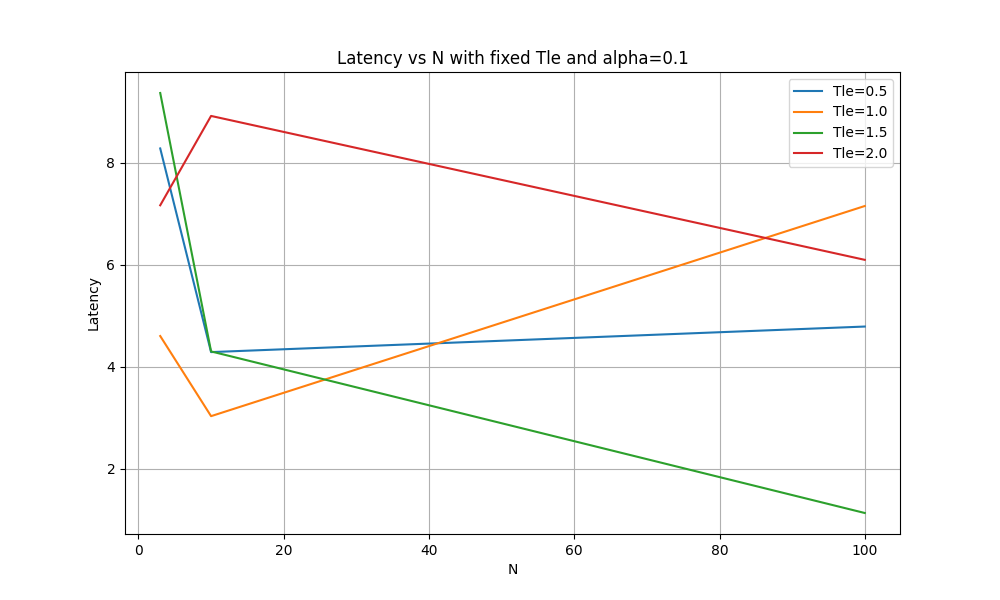

aaaaa


In [3]:
# Line Plot - Latency vs N for fixed tle and alpha
fixed_alpha = 0.1  # Choose a fixed value of alpha
subset = df[(df['Alpha'] == fixed_alpha)]
plt.figure(figsize=(10, 6))
for tle, group in subset.groupby('Tle'):
    plt.plot(group['N'], group['Execution Time'], label=f'Tle={tle}')
plt.xlabel('N')
plt.ylabel('Latency')
plt.title(f'Latency vs N with fixed Tle and alpha={fixed_alpha}')
plt.legend()
plt.grid(True)
plt.show()

print("aaaaa")

Heatmap of the latency for varryinf N and tle.
Usefull for interpreting both varrying tle with fixed N (raw) and varrying N with fixed tle (column).

/var/folders/bt/d1544_zx4mv6h8fnx8jsvq9r0000gn/T/ipykernel_75039/4069611745.py:4: FutureWarning: The provided callable <function mean at 0x105de1360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = subset.pivot_table(index='Tle', columns='N', values='Execution Time', aggfunc=np.mean)


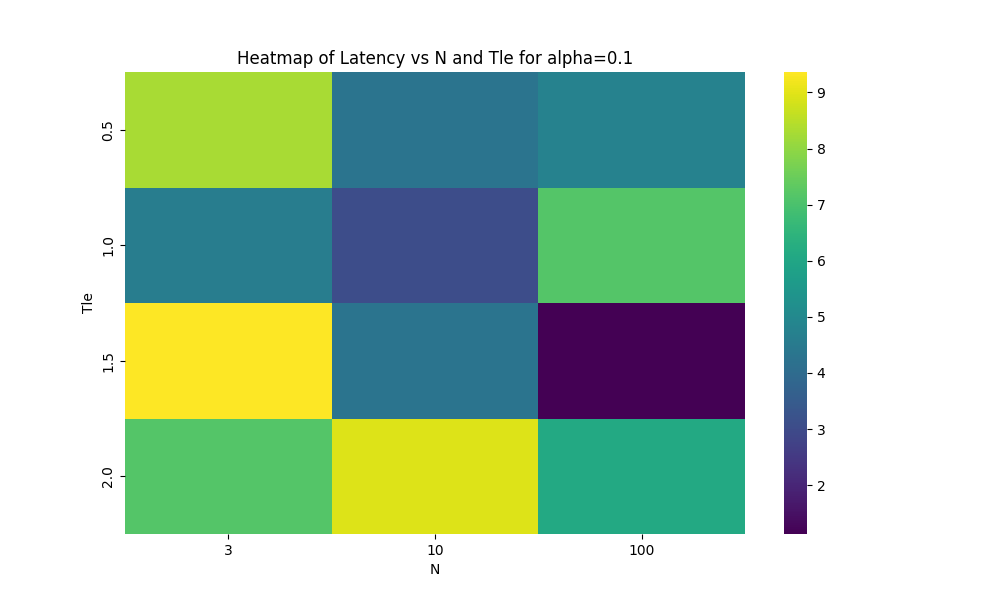

In [4]:
# Heatmap - Latency vs N and tle for fixed alpha
fixed_alpha = 0.1  # Choose a fixed value of alpha
subset = df[df['Alpha'] == fixed_alpha]
pivot = subset.pivot_table(index='Tle', columns='N', values='Execution Time', aggfunc=np.mean)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='viridis')
plt.xlabel('N')
plt.ylabel('Tle')
plt.title(f'Heatmap of Latency vs N and Tle for alpha={fixed_alpha}')
plt.show()


/var/folders/bt/d1544_zx4mv6h8fnx8jsvq9r0000gn/T/ipykernel_75039/2484447222.py:8: FutureWarning: The provided callable <function mean at 0x105de1360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = df.pivot_table(index='Tle', columns='N', values='Execution Time', aggfunc=np.mean)


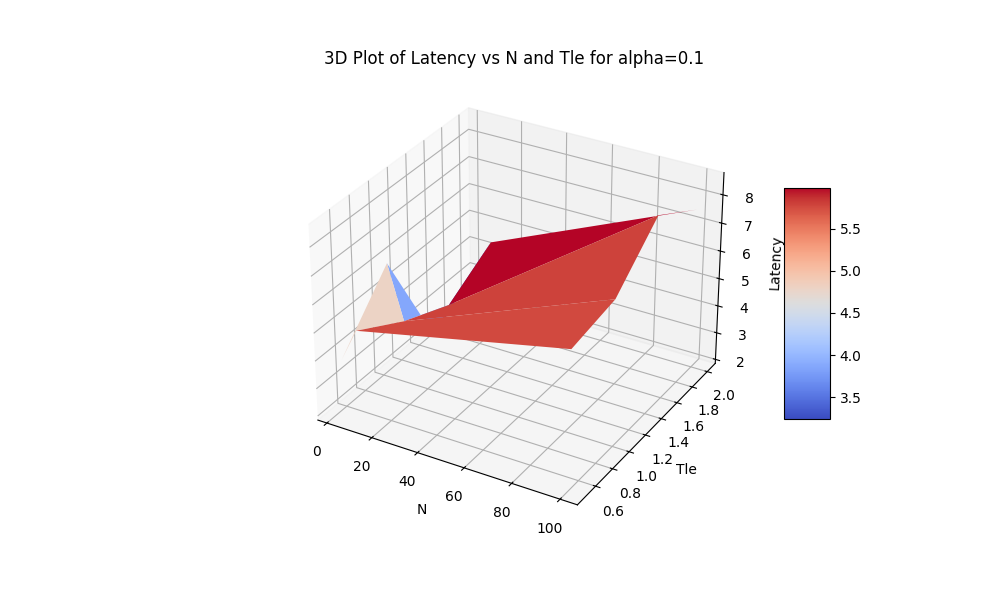

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for N and Tle
pivot = df.pivot_table(index='Tle', columns='N', values='Execution Time', aggfunc=np.mean)
pivot.columns = pivot.columns[::-1]
N_values = pivot.columns.astype(float).tolist()
tle_values = pivot.index.astype(float).tolist()
N_mesh, Tle_mesh = np.meshgrid(N_values, tle_values)

# Convert dataframe values to array
latency_values = pivot.values

# Plot surface
surf = ax.plot_surface(N_mesh, Tle_mesh, latency_values, cmap='coolwarm')



# Add labels and title
ax.set_xlabel('N')
ax.set_ylabel('Tle')
ax.set_zlabel('Latency')
ax.set_title(f'3D Plot of Latency vs N and Tle for alpha={fixed_alpha}')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)


# Show plot
plt.show()
